In [1]:
# Create plots from saved pickles of SMC HMXB simulations
from xrb.src.core import *
set_data_path("../../data")

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib import font_manager
import corner
import pickle

from xrb.SF_history import sf_history
from xrb.src import stats
from xrb.pop_synth import pop_synth
from xrb.binary import binary_evolve, load_sse

%matplotlib inline

In [3]:
sampler = pickle.load( open( INDATA("SMC_MCMC_sampler.obj"), "rb" ) )
# HMXB = pickle.load( open( INDATA("SMC_MCMC_HMXB_full.obj"), "rb" ) )

In [4]:
M1, M2, a, ecc, v_k, theta_k, phi_k, ra, dec, time = sampler.flatchain[0]

print pop_synth.full_forward(M1, M2, a, ecc, v_k, theta_k, phi_k, time)

(1.35, array([ 24.91875723]), array([  7.07184070e+33]), 47.951938799994934, array([  4.14937779e-12]), array([ 41.23117785]), 0.66935779437879983, array([ 0.00342578]), 1)


In [5]:
dtypes = [('M_NS','<f8'), \
        ('M_2','<f8'), \
        ('L_x','<f8'), \
        ('v_sys','<f8'), \
        ('M2_dot','<f8'), \
        ('A','<f8'), \
        ('ecc','<f8'), \
        ('theta','<f8'), \
        ('k_type','<i8')]

HMXB = np.zeros(len(sampler.flatchain), dtype=dtypes)


for i in np.arange(len(sampler.flatchain)):
    
    if i % 100000 == 0:
        print i
    
    M1, M2, a, ecc, v_k, theta_k, phi_k, ra, dec, time = sampler.flatchain[i]

    M_NS, M_2_tmp, L_x_tmp, v_sys_tmp, M2_dot_out, A_out, e_tmp, theta_out, k_type = \
        pop_synth.full_forward(M1, M2, a, ecc, v_k, theta_k, phi_k, time)
    
    HMXB["M_NS"][i] = M_NS
    HMXB["M_2"][i] = M_2_tmp
    HMXB["L_x"][i] = L_x_tmp
    HMXB["v_sys"][i] = v_sys_tmp
    HMXB["M2_dot"][i] = M2_dot_out
    HMXB["A"][i] = A_out
    HMXB["ecc"][i] = e_tmp
    HMXB["theta"][i] = theta_out
    HMXB["k_type"][i] = k_type



0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000

In [6]:
pickle.dump( HMXB, open( INDATA("SMC_MCMC_HMXB_full.obj"), "wb" ) )

In [21]:
print len(HMXB)


idx_k3 = np.where(HMXB['k_type'] == 3)[0]
idx_k5 = np.where(HMXB['k_type'] == 5)[0]
idx_k6 = np.where(HMXB['k_type'] == 6)[0]
idx_k9 = np.where(HMXB['k_type'] == 9)[0]
idx_k10 = np.where(HMXB['k_type'] == 13)[0]
idx = np.intersect1d(np.where(HMXB['k_type'] > 2.0)[0], np.where(HMXB['M_2'] > 12.0)[0])

print len(idx)
print len(idx_k3)
print len(idx_k5)
print len(idx_k6)
print len(idx_k9)
print len(idx_k10)
print idx_k10[0]

16000000
1391655
1207
61287
0
0
80772
19771


In [23]:
i = 1

print sampler.flatchain[idx_k10[i]]

M1, M2, a, ecc, v_k, theta_k, phi_k, ra, dec, time = sampler.flatchain[idx_k10[i]]

M_NS, M_2_tmp, L_x_tmp, v_sys_tmp, M2_dot_out, A_out, e_tmp, theta_out, k_type = \
        pop_synth.full_forward(M1, M2, a, ecc, v_k, theta_k, phi_k, time)

print "Full forward:", M_NS, M_2_tmp, L_x_tmp, v_sys_tmp, M2_dot_out, A_out, e_tmp, theta_out, k_type



M_1_b, M_2_b, A_b = binary_evolve.func_MT_forward(M1, M2, a, ecc)
A_tmp, v_sys_tmp, e_tmp = binary_evolve.func_SN_forward(M_1_b, M_2_b, A_b, v_k, theta_k, phi_k)
M_2_tmp, L_x_tmp, M2_dot_out, A_out = binary_evolve.func_Lx_forward(M1, M2, M_2_b, A_tmp, e_tmp, time)
tobs_eff = binary_evolve.func_get_time(M1, M2, time)
M_tmp, M_dot_tmp, R_tmp, k_type = load_sse.func_get_sse_star(M_2_b, tobs_eff)

print "Individual: 1.35", M_2_tmp, L_x_tmp, v_sys_tmp, M2_dot_out, A_out, e_tmp, k_type
print L_x_tmp == 0.0


M1_b, M2_b, A_b = binary_evolve.func_MT_forward(M1, M2, a, ecc)
A_c, v_sys, ecc_out = binary_evolve.func_SN_forward(M1_b, M2_b, A_b, v_k, theta_k, phi_k)
M2_d_out, L_x_out, M_dot_out, A_d = binary_evolve.func_Lx_forward(M1, M2, M2_b, A_c, ecc_out, time)
print M2_d_out, L_x_out, M_dot_out, A_d
print L_x_out == 0.0
if ecc_out < 0.0 or ecc_out > 1.0 or np.isnan(ecc) or L_x_out==0.0: print "YES"


sf_history.load_sf_history()
print stats.ln_posterior_population(sampler.flatchain[idx_k10[i]])
print sampler.flatlnprobability[idx_k10[i]]

    

[   9.19658971    2.83160861  245.51513673    0.7152946   134.17062188
    1.95148268    2.59719855   12.13708327  -73.42143025   58.14720759]
Full forward: 1.35 [ 1.3956213] [  1.02961852e+24] 18.3546129912 [  6.04125065e-22] [ 737.60517271] 0.736121758564 [ 0.00198479] 13
Individual: 1.35 [ 1.3956213] [  1.02961852e+24] 18.3546129912 [  6.04125065e-22] [ 737.60517271] 0.736121758564 [ 13.]
[False]
[ 1.3956213] [  1.02961852e+24] [  6.04125065e-22] [ 737.60517271]
[False]
1.28213341191
1.28213341191


In [5]:
tmp_i = np.random.randint(len(idx), size=10)


for i in np.arange(10):
    print HMXB['k_type'][idx[tmp_i[i]]], HMXB['M2_dot'][idx[tmp_i[i]]], sampler.flatlnprobability[idx[tmp_i[i]]]
    
    M2_b = HMXB['M_2'][idx[tmp_i[i]]]
    M1 = sampler.flatchain[idx[tmp_i[i]]][0]
    M2 = sampler.flatchain[idx[tmp_i[i]]][1]
    
    print sampler.flatchain[idx[tmp_i[i]]][9], load_sse.func_sse_tmax(M2_b) - binary_evolve.func_get_time(M1, M2, 0.0)

4 2.3055430516e-07 -0.965720161192
13.2443190272 25.3963712049
4 3.607574637e-07 4.10092827438
48.5146677309 46.7068041324
13 0.0 -4.21104249037
7.76352694457 24.1979187197
14 0.0 2.90936492173
34.8787878615 34.8803266784
14 0.0 1.512941093
12.2868075236 13.2408461784
13 0.0 -5.17315508255
52.7103233626 54.0270512102
14 0.0 -4.3916112094
11.5282957234 12.1739463118
13 0.0 3.16360580584
32.4865609282 34.2255838364
13 0.0 -0.524620915331
14.6396946258 21.9108993113
4 4.18799661202e-06 -5.14540848863
10.2415121001 15.0029513113


In [ ]:
t_obs < load_sse.func_sse_ms_time(M1)
M_1_b, M_2_b, A_b = binary_evolve.func_MT_forward(M1, M2, A, ecc)
t_obs < load_sse.func_sse_tmax(M1)
A_tmp, v_sys_tmp, e_tmp = binary_evolve.func_SN_forward(M_1_b, M_2_b, A_b, v_k, theta, phi)
M_2_tmp, L_x_tmp, M2_dot_out, A_out = binary_evolve.func_Lx_forward(M1, M2, M_2_b, A_tmp, e_tmp, t_obs)



    M1_b, M2_b, A_b = binary_evolve.func_MT_forward(M1, M2, A, ecc)
    A_c, v_sys, ecc_out = binary_evolve.func_SN_forward(M1_b, M2_b, A_b, v_k, theta, phi)
    M2_d_out, L_x_out, M_dot_out, A_d = binary_evolve.func_Lx_forward(M1, M2, M2_b, A_c, ecc_out, t_b)



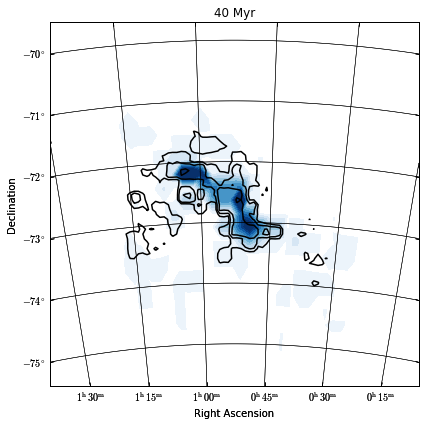

In [52]:
fig, ax = plt.subplots(1, 2, figsize=(6,6))
                                     
sf_history.get_SMC_plot_polar(40.0, ax=ax[0], ra_dist=sampler.flatchain.T[7][idx], dec_dist=sampler.flatchain.T[8][idx], dist_bins=60, xwidth=3.0, ywidth=3.0)

plt.tight_layout()
plt.show()

In [8]:
start_time = time.time()

sampler_new = stats.run_emcee_population(nburn=10, nsteps=10000, nwalkers=80)
print "Elapsed time:", time.time() - start_time, "seconds"

Elapsed time: 220.171941042 seconds


In [12]:
for i in np.arange(len(sampler_new.flatchain)):

    M1, M2, a, ecc, v_k, theta_k, phi_k, ra, dec, t_b = sampler_new.flatchain[i]

    M_NS, M_2_tmp, L_x_tmp, v_sys_tmp, M2_dot_out, A_out, e_tmp, theta_out, k_type = \
        pop_synth.full_forward(M1, M2, a, ecc, v_k, theta_k, phi_k, t_b)

    t_max = (load_sse.func_sse_tmax(M_2_tmp) - binary_evolve.func_get_time(M1, M2, 0.0))
    
    if t_b > t_max: print M1, M2
    
print sampler_new.acceptance_fraction

[ 0.12    0.1392  0.1234  0.1123  0.1217  0.1303  0.1205  0.1177  0.1233
  0.1149  0.1199  0.1501  0.1055  0.1266  0.1186  0.1186  0.1336  0.1072
  0.1179  0.1284  0.1294  0.1268  0.1201  0.0959  0.0951  0.1347  0.1332
  0.1039  0.1304  0.15    0.1259  0.1233  0.1224  0.0916  0.1165  0.1035
  0.1222  0.1253  0.1357  0.1168  0.0911  0.1031  0.1182  0.1149  0.1204
  0.1244  0.1189  0.1428  0.1255  0.1212  0.112   0.1112  0.1127  0.1067
  0.1273  0.1369  0.1186  0.1187  0.1359  0.1089  0.1106  0.1064  0.1108
  0.1333  0.1094  0.1321  0.1177  0.1258  0.1187  0.1173  0.1396  0.1227
  0.1271  0.1216  0.1172  0.1078  0.1244  0.1054  0.1147  0.1355]


In [14]:
M1_true = 13.0
M2_true = 10.0
A_true = 150.0
ecc_true = 0.7
v_k_true = 250.0
theta_true = 2.9
phi_true = 0.9
ra_true = 13.51
dec_true = -72.7
t_b_true = 22.0

sampler_sys1 = pickle.load( open( "../../data/sys1_MCMC_multiburn_sampler.obj", "rb" ) )


In [18]:

for i in np.arange(10000):

    M1, M2, a, ecc, v_k, theta_k, phi_k, ra, dec, t_b = sampler_sys1.flatchain[i]

    M_NS, M_2_tmp, L_x_tmp, v_sys_tmp, M2_dot_out, A_out, e_tmp, theta_out, k_type = \
        pop_synth.full_forward(M1, M2, a, ecc, v_k, theta_k, phi_k, t_b)

    t_max = (load_sse.func_sse_tmax(M_2_tmp) - binary_evolve.func_get_time(M1, M2, 0.0))
    
    if t_b > t_max: print M1, M2


13.5622800394 11.0747212046
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2866190856 11.7581621438
13.2577085683 11.8343929863
13.2577085683 11.8343929863
13.2577085683 11.8343929863
13.2577085683 11.8343929863
13.2577085683 11.8343929863
13.4493412159 11.9366293803
13.4493412159 11.9366293803
13.4493412159 11.9366293803
13.4493412159 11.9366293803
13.4942016716 11.9125575128
13.4942016716 11.9125575128
13.4942016716 11.9125575128
13.4942016716 11.9125575128
13.4942016716 11.9125575128
13.4942016716 11.9125575128
13.4942016716 11.9125575128
13.7379958372 11.7817389384
13.7379958372 11.7817389384
13.7379958372 11.7817389384
13.7379958372 11.7817389384
13.7379958372 11.7817389384
13.7379958372 11.781

In [23]:
sampler_sys4 = pickle.load( open( INDATA("sys4_MCMC_multiburn_sampler.obj"), "rb" ) )

In [24]:
dtypes = [('M_NS','<f8'), \
        ('M_2','<f8'), \
        ('L_x','<f8'), \
        ('v_sys','<f8'), \
        ('M2_dot','<f8'), \
        ('A','<f8'), \
        ('ecc','<f8'), \
        ('theta','<f8'), \
        ('k_type','<i8')]

HMXB_sys4 = np.zeros(len(sampler_sys4.flatchain), dtype=dtypes)


for i in np.arange(len(sampler_sys4.flatchain)):
# for i in np.arange(100000):
    
    if i % 100000 == 0:
        print i
    
    M1, M2, a, ecc, v_k, theta_k, phi_k, ra, dec, time = sampler_sys4.flatchain[i]

    M_NS, M_2_tmp, L_x_tmp, v_sys_tmp, M2_dot_out, A_out, e_tmp, theta_out, k_type = \
        pop_synth.full_forward(M1, M2, a, ecc, v_k, theta_k, phi_k, time)
    
    HMXB_J0045["M_NS"][i] = M_NS
    HMXB_J0045["M_2"][i] = M_2_tmp
    HMXB_J0045["L_x"][i] = L_x_tmp
    HMXB_J0045["v_sys"][i] = v_sys_tmp
    HMXB_J0045["M2_dot"][i] = M2_dot_out
    HMXB_J0045["A"][i] = A_out
    HMXB_J0045["ecc"][i] = e_tmp
    HMXB_J0045["theta"][i] = theta_out
    HMXB_J0045["k_type"][i] = k_type



0
100000
200000
300000


KeyboardInterrupt: 

In [25]:
print len(HMXB_J0045[HMXB_J0045['k_type'] < 6])
print len(HMXB_J0045[HMXB_J0045['k_type'] >= 6])

4000000
0
